In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

##Main functions:
    - Generate the secondray structure of the given sequence.
    - Generate graph from the sequence.
    - Display the generated graph without the basepair relation.
    - Recognize basepairs and add them to the graph generated graph.

In [2]:
#Generate the secondray structure of the given sequence
import subprocess as sp
def subprocess_wrapper(sequence):
#sequence='ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCG'
    flags='--noPS'
    cmd = 'echo "%s" | RNAfold %s' % (sequence, flags)
    out = sp.check_output(cmd, shell=True)
    text = out.strip().split('\n')
    seq= text[0]
    struc= text[1].split()[0]
    return seq, struc

In [3]:
#generate graph from the sequence
import networkx as nx
def string_to_graph(seq, struc):
    seq= seq[0]
    G = nx.Graph()
    for i,letter in enumerate(seq):
        G.add_node(i, label = seq[i])
        if i > 0:
            G.add_edge(i-1, i, label = 'x')
    return G

In [4]:
#The display of the generated graph
from eden.util import display
print "graph display"
def graph_display(seq, struc):
    print "display"
    #for text in words:
    word_graph = string_to_graph(seq, struc)
#    display.draw_graph(word_graph,node_size=100, font_size=9, node_border=True, size_x_to_y_ratio=3, prog='circo')

graph display


In [5]:
#Recognize basepairs and add them to the generated graph
import re
import networkx as nx
from eden.util import display

def basepair_relation(seq, struc):
    seq = seq[0]
    struc = struc[1].split()[0]
    open_pran = '('
    close_pran = ')'
    stack = []
    stack_s = []
    G = nx.Graph()
    for l, m in enumerate(seq):
        for i, k in enumerate(struc):
            G.add_node(i, label = seq[i])
            if i > 0:
                G.add_edge(i-1, i, label= 'x')
            if struc[i] == open_pran:
                j = i
                stack_s.append(struc[i])
                stack.append(struc[i])
            if struc[i] == close_pran:
                stack_s.pop()
                G.add_edge(i, j, label = 'b')
#    print 'here'
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, size_x_to_y_ratio=10, prog='circo')

# Experiment

In [6]:
def call_all():
    sequence = 'ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC'
    seq = subprocess_wrapper(sequence)
    struc = subprocess_wrapper(sequence)
    print "Graph without base pairing"
    graph_display(seq, struc)
    print "Graph with base pairing"
    basepair_relation(seq, struc)

here
('text:', ['ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC', '.....(((((((((....))))))))).... (-13.80)'])
('seq:', 'ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC')
('dotbrackets:', '.....(((((((((....)))))))))....')
('text:', ['ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC', '.....(((((((((....))))))))).... (-13.80)'])
('seq:', 'ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC')
('dotbrackets:', '.....(((((((((....)))))))))....')
basepair_relation


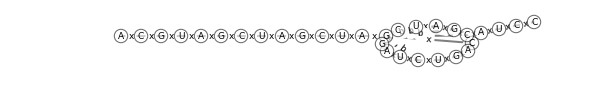

In [13]:
call_all()

('stack_s', ['('])
('stack', [])
('stack_s', ['(', '('])
('stack', ['('])
('stack_s', ['(', '(', '('])
('stack', ['(', '('])
here


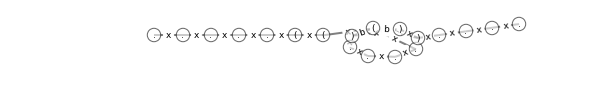

In [9]:
basepair_relation('.....(((....)))....')